In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel


In [2]:

# 1. RBF Kernel Function
def rbf_kernel_custom(X, Y=None, gamma=1.0):
    """
    Custom implementation of the RBF kernel.

    Args:
    X (numpy array): Input data of shape (n_samples, n_features)
    Y (numpy array): Input data of shape (m_samples, n_features), defaults to None
    gamma (float): The parameter controlling the width of the RBF.

    Returns:
    numpy array: RBF Kernel Matrix of shape (n_samples, m_samples)
    """
    if Y is None:
        Y = X

    # Compute the squared Euclidean distance between all pairs of points in X and Y
    norm_X = np.sum(X**2, axis=1).reshape(-1, 1)
    norm_Y = np.sum(Y**2, axis=1).reshape(1, -1)
    euclidean_dist = norm_X + norm_Y - 2 * np.dot(X, Y.T)
    # Apply the Gaussian function to the distance matrix
    kernel = np.exp(-gamma * euclidean_dist)
    return kernel

In [3]:
# 2. Generate a toy dataset (2D for visualization)
X, y = datasets.make_circles(n_samples=100, factor=0.5, noise=0.05)

In [6]:
# 3. Compute the RBF kernel matrix for the dataset
gamma = 1.0  # Set gamma (controls the width of the Gaussian)
K = rbf_kernel_custom(X, gamma=gamma)

# 4. Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

# 5. Train SVM with RBF Kernel (using precomputed kernel matrix)
svm_rbf = SVC(kernel='precomputed')
svm_rbf.fit(K, y)

# 6. Visualize the decision boundary for both models
# Create a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]



In [9]:
# Compute the RBF kernel for all grid points with the training set
K_grid = rbf_kernel_custom(grid_points, X, gamma=gamma)

# Predict using both SVM models
linear_pred = svm_linear.predict(grid_points)
rbf_pred = svm_rbf.predict(K_grid)

# Reshape predictions to match the grid shape
y_pred_linear = linear_pred.reshape(xx.shape)
y_pred_rbf = rbf_pred.reshape(xx.shape)

Text(0, 0.5, 'Feature 2')

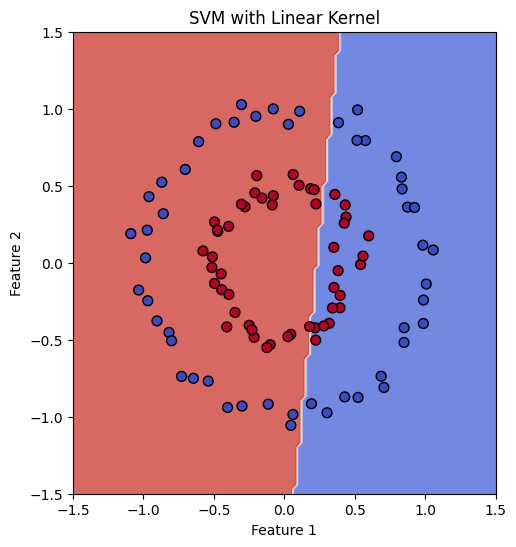

In [10]:
# Plot the decision boundary for the linear kernel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, y_pred_linear, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
plt.title("SVM with Linear Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")



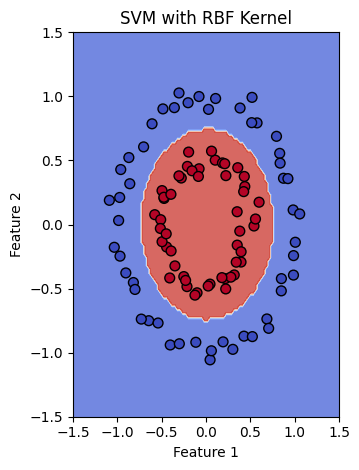

In [11]:
# Plot the decision boundary for the RBF kernel
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, y_pred_rbf, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=50)
plt.title("SVM with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

What do you underestand from the results? write your answer and compare the shapes

## Interpretation of Results
The decision boundary for linear SVM is a straight line. This shows that this model is limited and it is suitable for data points which are linearly seperable. If the data is not linearly seperable, this model can not classify data points properly and we may have many misclassified points after training process.

For RBF SVM, the decision boundary is non-linear and can adapts to the shape of the data. RBF Kernel allows SVM to create non-linear boundaries by mapping data into a higher-dimensional space.

## Shape Comparision
For linear SVM the shape of the decision regions is simple and inflexible, but adding RBF kernel to SVM model, cause complex and flexible shapes for decision regions. This property is achieved by mapping data points to a high-dimensional space.

